In [62]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/movies_cleaned_final.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9748 entries, 0 to 9747
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9748 non-null   object 
 1   Rating           9748 non-null   float64
 2   Runtime          9748 non-null   object 
 3   Directors        9748 non-null   object 
 4   Writers          9748 non-null   object 
 5   Stars            9748 non-null   object 
 6   Genres           9748 non-null   object 
 7   Popularity       9748 non-null   float64
 8   Budget           9748 non-null   float64
 9   Gross Worldwide  9748 non-null   float64
 10  URL              9748 non-null   object 
dtypes: float64(4), object(7)
memory usage: 837.8+ KB


### DataFrame Information (Data Types and Non-Null Counts)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

sns.set_style('whitegrid')

# --- 1. Clean and convert 'Runtime' to numerical (minutes) ---
def convert_runtime_to_minutes(runtime_str):
    if pd.isna(runtime_str):
        return np.nan
    parts = runtime_str.replace(' ', '').replace('m', '').split('h')
    hours = int(parts[0]) if parts[0] else 0
    minutes = int(parts[1]) if len(parts) > 1 and parts[1] else 0
    return hours * 60 + minutes

df['Runtime_minutes'] = df['Runtime'].apply(convert_runtime_to_minutes)

# --- 2. Clean and convert 'Budget' and 'Gross Worldwide' to numerical (float) ---
def clean_currency(currency_str):
    if pd.isna(currency_str):
        return np.nan
    s = str(currency_str).replace('$', '').replace(',', '').strip()
    # Use regex to find the numerical part, handling cases like '25000000 (estimated)'
    match = re.search(r'\d+\.?\d*(?:[MB])?', s)
    if match:
        s_numeric = match.group(0)
        if 'M' in s_numeric:
            return float(s_numeric.replace('M', '')) * 1_000_000
        if 'B' in s_numeric:
            return float(s_numeric.replace('B', '')) * 1_000_000_000
        try:
            return float(s_numeric)
        except ValueError:
            return np.nan # If it's just a number but can't be converted
    return np.nan # If no numeric part is found

df['Budget_numeric'] = df['Budget'].apply(clean_currency)
df['Gross_Worldwide_numeric'] = df['Gross Worldwide'].apply(clean_currency)

# --- 3. Convert 'Popularity' to numerical ---
# Assuming Popularity is a string representation of a number
df['Popularity_numeric'] = pd.to_numeric(df['Popularity'], errors='coerce')

print("Data cleaning and conversion complete.")

Data cleaning and conversion complete.


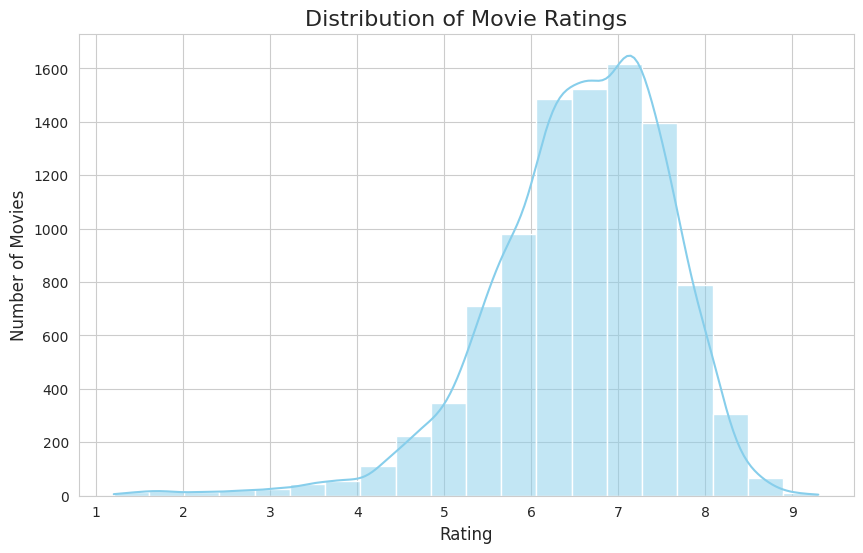

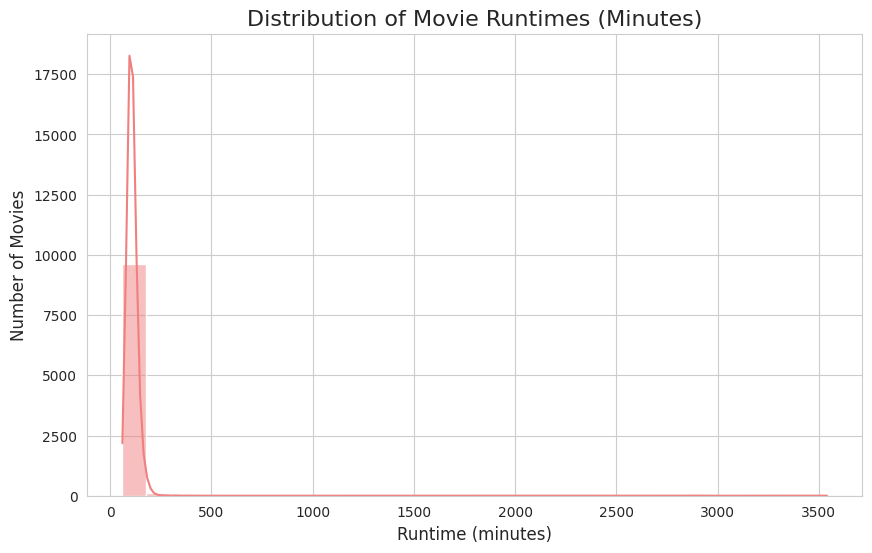

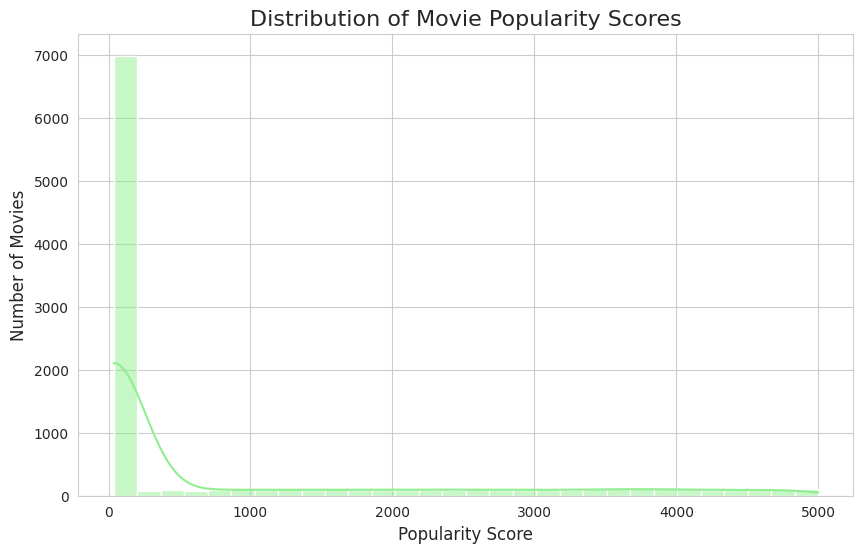

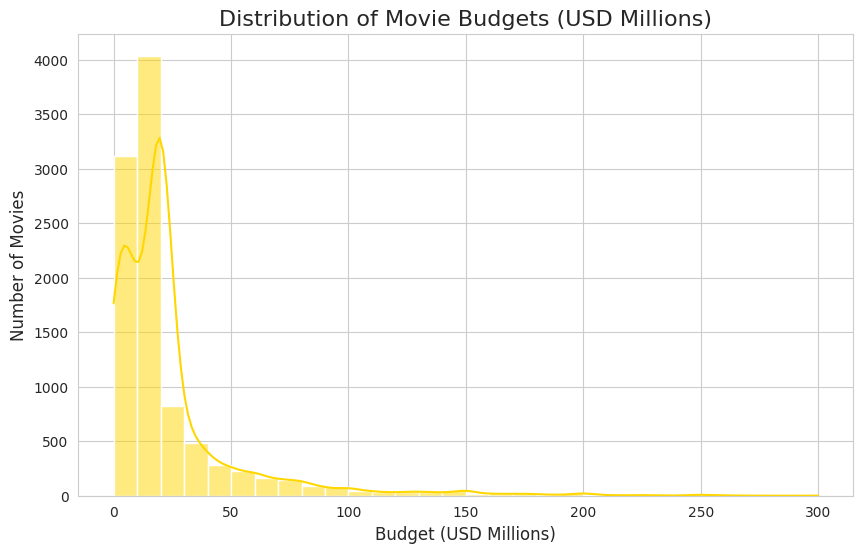

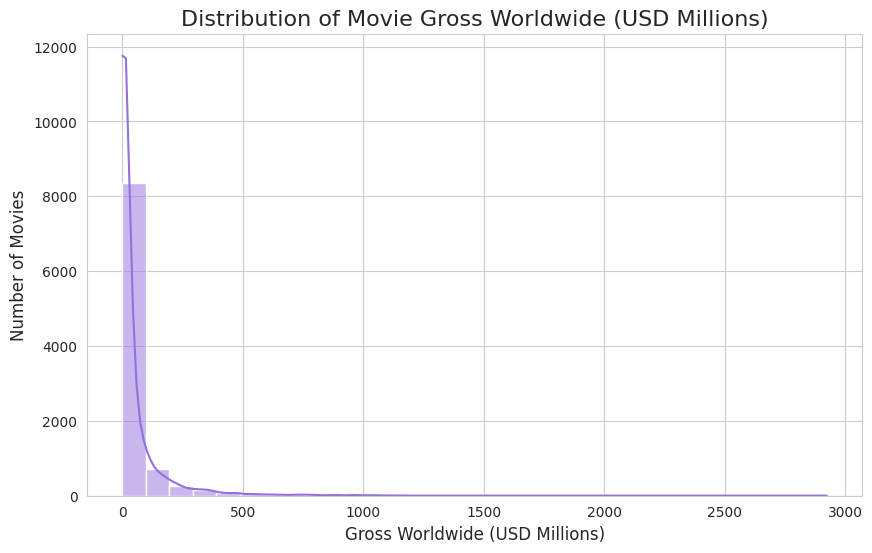

In [65]:
# Plotting 'Rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()

# Plotting 'Runtime_minutes'
plt.figure(figsize=(10, 6))
sns.histplot(df['Runtime_minutes'].dropna(), kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Movie Runtimes (Minutes)', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()

# Plotting 'Popularity_numeric'
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity_numeric'].dropna(), kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Movie Popularity Scores', fontsize=16)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()

# Plotting 'Budget_numeric' in Millions
plt.figure(figsize=(10, 6))
sns.histplot(df['Budget_numeric'].dropna() / 1_000_000, kde=True, bins=30, color='gold')
plt.title('Distribution of Movie Budgets (USD Millions)', fontsize=16)
plt.xlabel('Budget (USD Millions)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()

# Plotting 'Gross_Worldwide_numeric' in Millions
plt.figure(figsize=(10, 6))
sns.histplot(df['Gross_Worldwide_numeric'].dropna() / 1_000_000, kde=True, bins=30, color='mediumpurple')
plt.title('Distribution of Movie Gross Worldwide (USD Millions)', fontsize=16)
plt.xlabel('Gross Worldwide (USD Millions)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()

### Descriptive Statistics for All Numerical Columns

In [66]:
numerical_cols_for_describe = ['Rating', 'Runtime_minutes', 'Popularity_numeric', 'Budget_numeric', 'Gross_Worldwide_numeric']
display(df[numerical_cols_for_describe].describe())

,Rating,Runtime_minutes,Popularity_numeric,Budget_numeric,Gross_Worldwide_numeric
count,9748.000000,9748.000000,9748.000000,9.748000e+03,9.748000e+03
mean,6.566096,111.680345,776.753385,2.424731e+07,5.256326e+07
std,1.015219,99.803866,1385.895238,3.029819e+07,1.288608e+08
min,1.200000,60.000000,36.000000,5.280000e-01,6.000000e+00
25%,6.000000,94.000000,36.000000,7.000000e+06,3.918800e+05
50%,6.700000,104.000000,36.000000,2.000000e+07,9.371868e+06
75%,7.300000,118.000000,831.000000,2.300000e+07,4.400113e+07
max,9.300000,3540.000000,4999.000000,3.000000e+08,2.923711e+09


### Descriptive Statistics for All Categorical (Object) Columns

In [67]:
categorical_cols = df.select_dtypes(include='object').columns
display(df[categorical_cols].describe())

,Title,Runtime,Directors,Writers,Stars,Genres,URL
count,9748,9748,9748,9748,9748,9748,9748
unique,9528,177,4089,8404,9743,6602,9748
top,Obsesia,1h 35m,Woody Allen,Woody Allen,"Ian McKellen, Martin Freeman, Richard Armitage...",Drama,https://www.imdb.com/title/tt0120646/
freq,6,287,45,39,4,97,1


**Reasoning**:
I will define a function to extract individual genres from the 'Genres' column, split them by comma, strip whitespace, and then apply this function to the DataFrame to get a list of all individual genres.



In [68]:
def extract_genres(genres_series):
    all_genres = []
    for genres_string in genres_series:
        if isinstance(genres_string, str):
            genres_list = [genre.strip() for genre in genres_string.split(',')]
            all_genres.extend(genres_list)
    return pd.Series(all_genres)

# Apply the function to the 'Genres' column
all_individual_genres = extract_genres(df['Genres'])

# Count the occurrences of each unique genre
genre_counts = all_individual_genres.value_counts()

# Select the top 10 most frequent genres
top_10_genres = genre_counts.head(10)

print("Top 10 Genres:\n", top_10_genres)

Top 10 Genres:
 Drama          5792
Comedy         3773
Thriller       2915
Romance        2461
Action         2133
Crime          2060
Adventure      1515
Horror         1240
Mystery        1196
Dark Comedy    1126
Name: count, dtype: int64


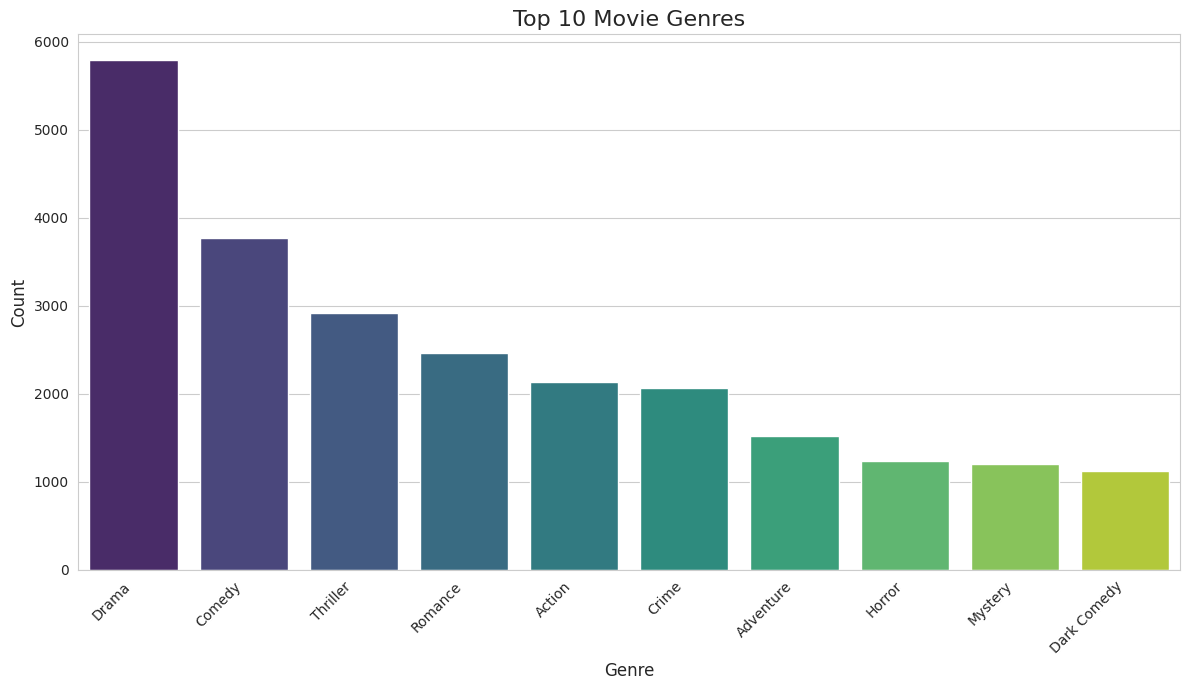

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for the top 10 genres
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, hue=top_10_genres.index, palette='viridis', legend=False)
plt.title('Top 10 Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Calculate Numerical Correlations



In [70]:
import numpy as np

def convert_runtime_to_minutes(runtime_str):
    if isinstance(runtime_str, str):
        hours = 0
        minutes = 0
        # Handle 'h' for hours and 'm' for minutes
        if 'h' in runtime_str:
            parts = runtime_str.split('h')
            hours = int(parts[0].strip())
            if 'm' in parts[1]:
                minutes = int(parts[1].replace('m', '').strip())
            elif parts[1].strip() == '': # case like '2h'
                minutes = 0
            else: # case like '2h 30'
                try:
                    minutes = int(parts[1].strip())
                except ValueError:
                    pass # Malformed, default to 0
        elif 'm' in runtime_str:
            minutes = int(runtime_str.replace('m', '').strip())
        else:
            # Handle cases where only numbers are present (e.g., '90') or malformed strings
            try:
                return int(runtime_str.strip()) # Assume it's already in minutes if no 'h' or 'm'
            except ValueError:
                return np.nan # Cannot parse
        return hours * 60 + minutes
    return np.nan # Return NaN for non-string or missing values

# Apply the function to the 'Runtime' column
df['Runtime_minutes'] = df['Runtime'].apply(convert_runtime_to_minutes)

# Display the first few rows with the new column and its info to verify
print(df[['Runtime', 'Runtime_minutes']].head())
print(df['Runtime_minutes'].info())

  Runtime  Runtime_minutes
0  2h 22m              142
1  2h 32m              152
2  2h 28m              148
3  2h 19m              139
4  2h 34m              154
<class 'pandas.core.series.Series'>
RangeIndex: 9748 entries, 0 to 9747
Series name: Runtime_minutes
Non-Null Count  Dtype
--------------  -----
9748 non-null   int64
dtypes: int64(1)
memory usage: 76.3 KB
None


**Reasoning**:
Now that the `Runtime` column has been successfully converted to `Runtime_minutes`, the next step is to create a list of the numerical columns for correlation analysis, calculate the correlation matrix for these selected columns, and then visualize it using a heatmap as specified in the subtask.



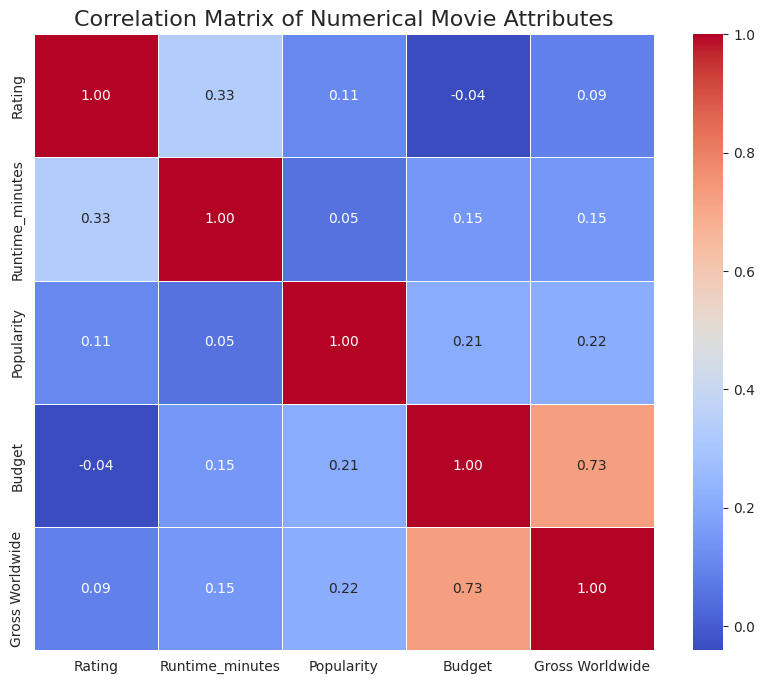

In [71]:
numerical_columns = ['Rating', 'Runtime_minutes', 'Popularity', 'Budget', 'Gross Worldwide']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Movie Attributes', fontsize=16)
plt.show()


## Visualize Bivariate Relationships




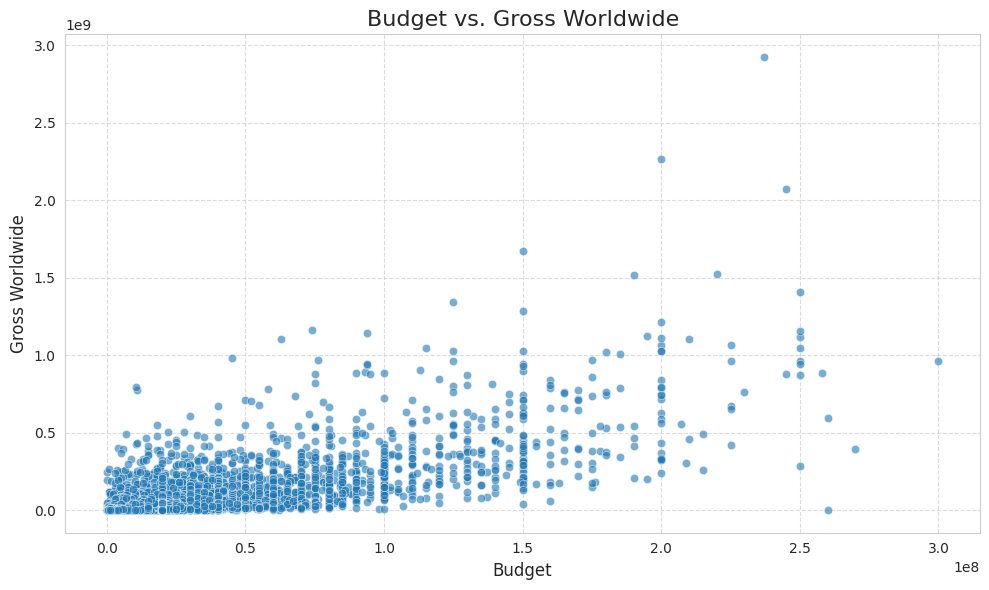

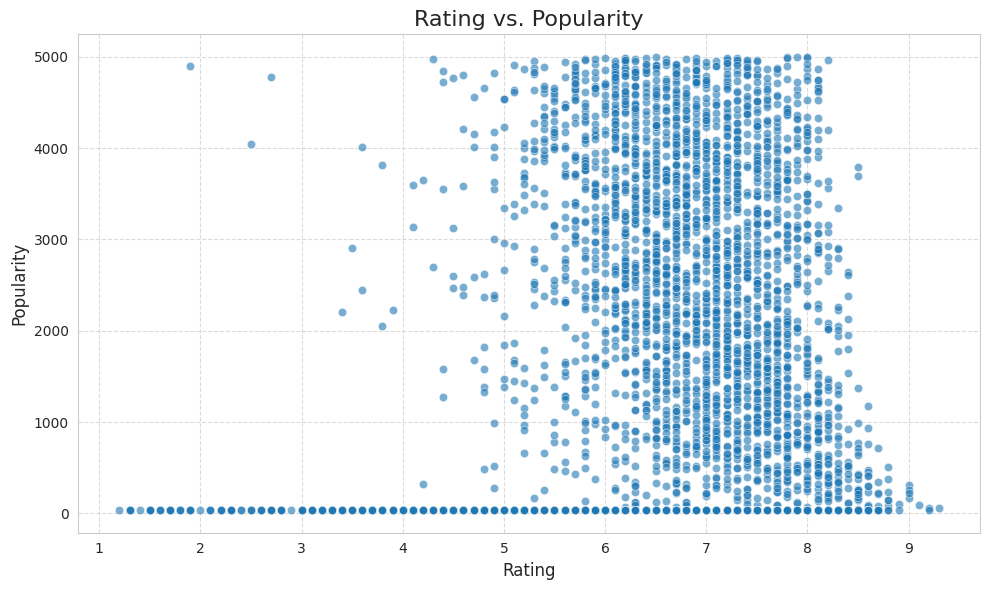

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for 'Budget' vs. 'Gross Worldwide'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Budget', y='Gross Worldwide', alpha=0.6)
plt.title('Budget vs. Gross Worldwide', fontsize=16)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Gross Worldwide', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a scatter plot for 'Rating' vs. 'Popularity'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Popularity', alpha=0.6)
plt.title('Rating vs. Popularity', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()